# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 5 in
C:\Users\Shan\anaconda3\envs\mlenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS")


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q='bitcoin',
    language='en',
sort_by='relevancy')
bitcoin_news['totalResults']

7182

In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q='ethereum',
    language='en')
ethereum_news['totalResults']

1564

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            'date': date,
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            'text': text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = [ 'date', "compound",  "negative", "neutral", "positive", "text",]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()



,date,compound,negative,neutral,positive,text
0,2021-01-03,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...
1,2021-01-14,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...
2,2021-01-18,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the..."
3,2021-01-14,0.6249,0.000,0.850,0.150,Cryptocurrency exchange company Gemini is acqu...
4,2021-01-28,0.0000,0.000,1.000,0.000,TL;DR: The Bitcoin and Cryptocurrency Mastery ...


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            'date': date,
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            'text': text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = [ 'date', "compound",  "negative", "neutral", "positive", "text",]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,compound,negative,neutral,positive,text
0,2021-01-28,0.0000,0.00,1.000,0.000,Coinbase plans to go public by way of a direct...
1,2021-02-03,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...
2,2021-01-05,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...
3,2021-01-04,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...
4,2021-01-04,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.095289,0.049316,0.870895,0.079842
std,0.410623,0.056518,0.121699,0.097944
min,-0.557400,0.000000,0.647000,0.000000
25%,-0.051350,0.000000,0.774500,0.000000
50%,0.000000,0.042000,0.896000,0.051000
75%,0.400150,0.088000,1.000000,0.149000
max,0.921700,0.176000,1.000000,0.353000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.058116,0.003158,0.981158,0.015684
std,0.192043,0.013765,0.039269,0.038172
min,-0.273200,0.000000,0.875000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,0.525600,0.060000,1.000000,0.125000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score at 0.0823.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score at 0.9217.

Q. Which coin had the highest positive score?

A: Bitcoin's max positive socre was higher which was 0.353.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'reflects', 'go', 'went', 'illustration','taken'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z \d]")
    re_clean = regex.sub(' ', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lower = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens =[word for word in lower if word not in sw.union(sw_addon)]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df.head()

,date,compound,negative,neutral,positive,text,tokens
0,2021-01-03,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[shattered, yearslong, aspiration, reaching, 2..."
1,2021-01-14,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...,"[ban, twitters, failure, promote, healthy, con..."
2,2021-01-18,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the...","[mt, gox, bankrupt, 2014, wa, world, largest, ..."
3,2021-01-14,0.6249,0.000,0.850,0.150,Cryptocurrency exchange company Gemini is acqu...,"[cryptocurrency, exchange, company, gemini, ac..."
4,2021-01-28,0.0000,0.000,1.000,0.000,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,"[tl, dr, bitcoin, cryptocurrency, mastery, bun..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df.head()

,date,compound,negative,neutral,positive,text,tokens
0,2021-01-28,0.0000,0.00,1.000,0.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, public, way, direct, listing,..."
1,2021-02-03,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, staff, file, photo, representation, ..."
2,2021-01-05,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...,"[cryptocurrencies, stole, headline, first, sto..."
3,2021-01-04,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...,"[ethereum, creator, vitalik, buterin, 14, 11, ..."
4,2021-01-04,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...,"[bitcoin, fizzled, monday, trading, famously, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
processed_bit = tokenizer(' '.join(bitcoin_df['text'].tolist()))
bigram_counts_bitcoin = Counter(ngrams(processed_bit, n=2))
bigram_counts_bitcoin.most_common(20)

[(('cryptocurrency', 'exchange'), 3),
 (('digital', 'currency'), 3),
 (('char', 'reuters'), 3),
 (('reuters', 'staff'), 3),
 (('reuters', 'bitcoin'), 3),
 (('000', 'value'), 2),
 (('jack', 'dorsey'), 2),
 (('elon', 'musk'), 2),
 (('char', 'coinbase'), 2),
 (('popular', 'cryptocurrency'), 2),
 (('char', 'posted'), 2),
 (('posted', 'bitcoin'), 2),
 (('bitcoin', 'traded'), 2),
 (('traded', '33'), 2),
 (('33', '365'), 2),
 (('365', 'asia'), 2),
 (('asia', 'monday'), 2),
 (('monday', 'soaring'), 2),
 (('soaring', 'record'), 2),
 (('record', 'high'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
processed_eth = tokenizer(' '.join(ethereum_df['text'].tolist()))
bigram_counts_ethereum = Counter(ngrams(processed_eth, n=2))
bigram_counts_ethereum.most_common(20)

[(('file', 'photo'), 16),
 (('virtual', 'currency'), 14),
 (('reuters', 'dado'), 13),
 (('dado', 'ruvic'), 13),
 (('char', 'reuters'), 12),
 (('reuters', 'staff'), 12),
 (('staff', 'file'), 12),
 (('currency', 'bitcoin'), 12),
 (('2020', 'reuters'), 10),
 (('bitcoin', 'seen'), 9),
 (('photo', 'representation'), 7),
 (('seen', 'picture'), 6),
 (('representation', 'virtual'), 6),
 (('photo', 'representations'), 6),
 (('representations', 'virtual'), 6),
 (('picture', 'march'), 5),
 (('march', '13'), 5),
 (('13', '2020'), 5),
 (('november', '19'), 4),
 (('19', '2020'), 4)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    tokens = tokenizer(big_string)
    
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_df['text'].tolist(), 10)

[('char', 19),
 ('bitcoin', 16),
 ('cryptocurrency', 8),
 ('reuters', 8),
 ('currency', 6),
 ('twitter', 4),
 ('ceo', 4),
 ('wa', 4),
 ('exchange', 4),
 ('company', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_df['text'].tolist(), 10)

[('reuters', 33),
 ('char', 19),
 ('bitcoin', 18),
 ('file', 16),
 ('photo', 16),
 ('currency', 15),
 ('virtual', 14),
 ('dado', 13),
 ('ruvic', 13),
 ('staff', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

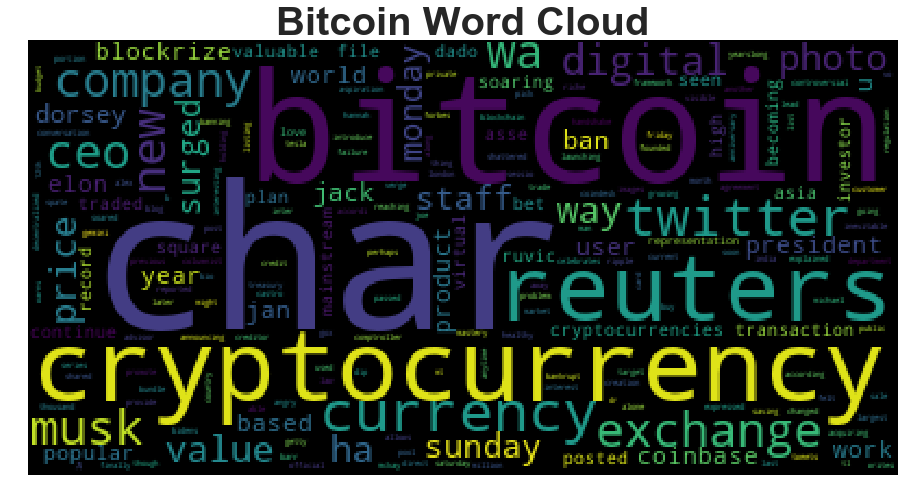

In [22]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(processed_bit))
plt.figure(figsize=(18,8))
plt.axis('off')
plt.imshow(wc)
plt.title('Bitcoin Word Cloud', fontsize=40, fontweight="bold")
plt.show()


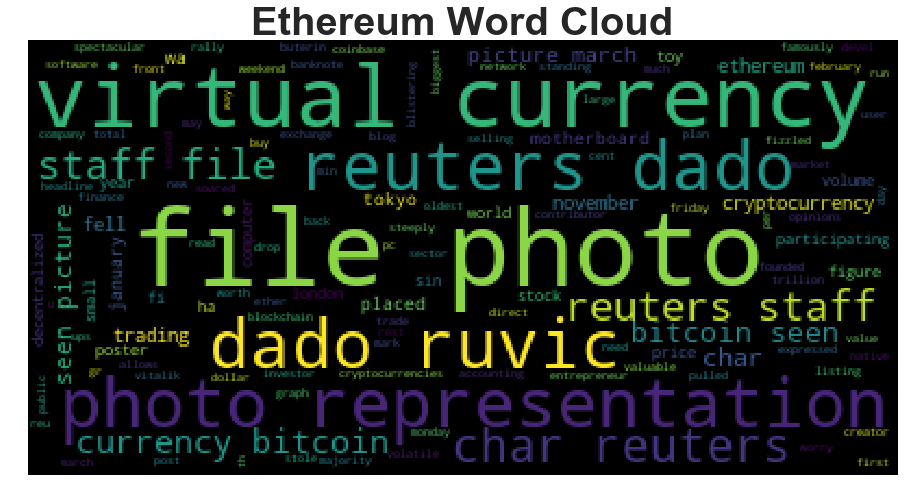

In [23]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(' '.join(processed_eth))
plt.figure(figsize=(18,8))
plt.axis('off')
plt.imshow(wc_eth)
plt.title('Ethereum Word Cloud', fontsize=40, fontweight="bold")
plt.show()


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(bitcoin_df['text'].tolist())
bitcoin_text

'Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars] Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [+3185 chars] When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, creditors might finally be able to get a portion of those riche… [+626 chars] Cryptocurrency exchange company Gemini is acquiring Blockrize and announcing a new product today based on Blockrizes work. Later this year, the company is launching a credit card that works like a re… [+1479 chars] TL;DR: The Bitcoin and Cryptocurrency Mastery Bundle is on sale for £21.11 as of Jan. 28, saving you 70% on list price.\r\nBitcoin and t

In [28]:
# Run the NER processor on all of the text
doc_bit = nlp(bitcoin_text)

# Add a title to the document
doc_bit.user_data["title"] = "Bitcoin NER"

In [40]:
# Render the visualization
svg = displacy.render(doc_bit, style='ent')

In [41]:
# List all Entities
for ent in doc_bit.ents:
    print(ent.text, ent.label_)

Just weeks DATE
20,000 MONEY
Bitcoin GPE
Saturday DATE
33,000 MONEY
CoinDesk PERSON
Twitters NORP
Hannah McKay-Pool/Getty PERSON
Twitter ORG
Jack Dorsey PERSON
Tweets GPE
US GPE
Don PERSON
Mt. Gox PERSON
2014 DATE
Bitcoin GPE
850,000 CARDINAL
Bitcoins PERSON
thousands CARDINAL
Gemini PERSON
Blockrize PERSON
today DATE
Blockrizes GPE
Later this year DATE
Bitcoin GPE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin GPE
Friday, DATE
Tesla ORDINAL
Elon Musk ORG
Twitter ORG
Musk PERSON
Joe Bidens PERSON
the U.S. Treasury Department ORG
Michael S. Barr PERSON
bitcoin GPE
the popular cryptocurrency exchange ORG
digital ORG
over millions CARDINAL
India GPE
today DATE
2012 DATE
Last Sunday DATE
Bitcoin GPE
50% PERCENT
the previous month DATE
the week DATE
24.8% PERCENT
Bitcoin GPE
12th ORDINAL
Forbes ORG
Square PRODUCT
Alex Castro PERSON
The Verge ORG
Jack Dorsey PERSON
Twitter and Square ORG
Reuters ORG
LONDON GPE
Jan 4 DATE
Reuters ORG
Bitcoin GPE
14% PERCENT
27,805 MONEY
Monday DATE
the new year

---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(ethereum_df['text'].tolist())
ethereum_text

"Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.\r\nThe cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars] By Reuters Staff\r\nFILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars] Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.\r\nBut investors need not worry … [+2877 chars] Ethereum creator Vitalik Buterin.\r\n14 with 11 posters participating\r\nEther, the native currency of the Ethereum network and the second most valuable cryptocurrency, has soared above $1,000 for the fi… [+3015 chars] Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPric

In [43]:
# Run the NER processor on all of the text
doc_eth = nlp(ethereum_text)

# Add a title to the document
doc_eth.user_data["title"] = "Ethereum NER"

In [44]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [45]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text, ent.label_)

today DATE
2012 DATE
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Bitcoin GPE
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
January DATE
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
1 CARDINAL
1 CARDINAL
more than $1 trillion MONEY
bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG


---